#**Projeto A3: Comitê de Classificadores**

Nesse projeto nós iremos trabalhar com a base de dados Census do Census Bureau (USCB), onde vamos criar um modelo de predição para classificar os individuos como **homem** ou **mulher** 


##**Sobre a base de dados Census**

A base de dados Census que vamos utilizar foi criada em 1996 pelo *United States Census Bureau* (USCB), a principal agência do sistema de estatística federal dos EUA, ela faz parte do departamento de comércio e o seu diretor da é escolhido pelo presidente dos Estados Unidos. 
Seu propósito é coletar dados das pessoas e da economia norte americana a cada 10 anos afim de ajudar o estado, as comunidades locais e os comércios a tomarem decisões mais assertivas.
 

#1 - **Entendendo o problema** *(CRISP-DM)*

Durante muitos anos os papeis do homem e da mulher foram claramente divididos, criando padrões que delimitavam o que uma pessoa poderia ou não escolher ser, porém esses padrões são também barreiras que limitam nossa percepção do individuo apenas pelo seu sexo, e por isso se faz necessário desconstruir esses padrões para que todos sejam livres para escolher seu caminho e se desenvolver em qualquer área do conhecimento.


O primeiro passo para darmos inicío a esse processo de mudança é entender esses padrões, por isso o objetivo desse projeto é análisar os dados coletados em 1994 de mais de 30 mil estadunienses e analisá-los utilizando algoritmos classificadores e técnicas de *Machine Learning* para obter dados assertivos capazes de delinear claramente esses padrões.



#2 - **Obtenção dos dados** *(CRISP-DM)*

In [ ]:
#Bibliotecas de manipulação e Visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import graphviz
import pydotplus
from IPython.display import Image 

from sklearn.metrics import classification_report, confusion_matrix #Avaliação
from sklearn.model_selection import train_test_split #Treino e Teste

from sklearn import tree #Árvore de Decisões
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #Naive Bayes
#Redes Neurais

In [ ]:
trn = pd.read_csv('adult.csv') #Definindo dataset

#3 - **Explorando a base** *(CRISP-DM)*

In [ ]:
trn.info() #Visualizar os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   final.weight    30162 non-null  int64 
 4   education       30162 non-null  object
 5   education.num   30162 non-null  int64 
 6   marital.status  30162 non-null  object
 7   occupation      30162 non-null  object
 8   relationship    30162 non-null  object
 9   race            30162 non-null  object
 10  sex             30162 non-null  object
 11  capital.gain    30162 non-null  int64 
 12  capital.loos    30162 non-null  int64 
 13  hour.per.week   30162 non-null  int64 
 14  native.country  30162 non-null  object
 15  income          30162 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.7+ MB


In [ ]:
trn.isnull().sum() #Procurar por valores em branco

Unnamed: 0        0
age               0
workclass         0
final.weight      0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loos      0
hour.per.week     0
native.country    0
income            0
dtype: int64

In [ ]:
trn.columns = trn.columns.str.replace('.', '_') #Renomear as colunas para visualizar os dados

In [ ]:
trn.head() #Observar as cinco primeiras linhas do dataset

,Unnamed: 0,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loos,hour_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
trn.describe(include='all') #Analisando a distribuição estatística dos dados

,Unnamed: 0,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loos,hour_per_week,native_country,income
count,30162.000000,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,16288.103242,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,9383.401676,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,1.000000,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,8179.250000,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,16286.500000,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,24402.750000,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 3.1 - **Dicionário de Dados**

*   **age** = Teenager (17-19), Young (20-29), Adult (30-55), Senior (56-70) and Old (71+).
*   **workclass** = Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

*   **final.weight** = Continuous (?)
*   **education** = Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*   **education.num** = Continuous (?)
*   **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
*   **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
*   **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
*   **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
*   **sex**: Female, Male. 
*   **capital-gain** and **capital-loss**: None (0), Low (0 < median of the values greater zero < max) and High (>=max).
*   **hours-per-week**: Part-time (0-25), Full-time (26-45), Over-time (46-65) and Too-much (66+).
*   **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.





#4 - **Pré-processamento** *(CRISP-DM)*




##4.1 - **Transformar dados numéricos em strings**

Nós iremos transformar os dados numéricos das colunas 'age' e 'hours.per.week' em dados string para facilitar a leitura dos resultados e dos gráficos no final do nosso projeto.

*   age = Teenager (17-19), Young (20-29), Adult (30-55), Senior (56-70) and Old (71+).
*   hours.per.week: Part-time (0-25), Full-time (26-45), Over-time (46-65) and Workaholic (66+).




In [ ]:
def fase(idade):
  if idade.iloc[0] <= 19:
    idd = 'Teenager'
  elif idade.iloc[0] <= 29:
    idd = 'Young'
  elif idade.iloc[0] <= 55:
    idd = 'Adult'
  elif idade.iloc[0] < 70:
    idd = 'Senior'
  else:
    idd = 'Old'
  return idd

trn['age'] = trn[['age']].apply(fase, axis=1)

In [ ]:
trn.age

0         Adult
1         Adult
2         Adult
3         Adult
4         Young
          ...  
30157     Young
30158     Adult
30159    Senior
30160     Young
30161     Adult
Name: age, Length: 30162, dtype: object

In [ ]:
def hours(pwek):
  if pwek.iloc[0] <= 25:
    hpw = 'Part-time'
  elif pwek.iloc[0] <= 45:
    hpw = 'Full-time'
  elif pwek.iloc[0] <= 65:
    hpw = 'Over-time'
  else:
    hpw = 'Workaholic'
  return hpw

trn['hour_per_week'] = trn[['hour_per_week']].apply(hours,axis=1)

In [ ]:
trn.hour_per_week

0        Full-time
1        Part-time
2        Full-time
3        Full-time
4        Full-time
           ...    
30157    Full-time
30158    Full-time
30159    Full-time
30160    Part-time
30161    Full-time
Name: hour_per_week, Length: 30162, dtype: object

##4.2 - **Transformar strings em dados binários**

Para que o resultado do nosso projeto tenha resultados conclusivos precisamos excluir algumas colunas de dados que são pouco ou nada importantes a proposta do projeto devido a qualidade dos dados. O *capital.gain* por exemplo, tem 75% das linhas preenchidas com o número zero, ou seja, a maioria das linhas está preenchidas com nenhuma informação relevante.



In [ ]:
#Excluir colunas com dados irrelevantes.
trn.drop(['Unnamed: 0', 'final_weight', 'education_num', 'capital_gain', 'capital_loos'], axis=1, inplace=True) 

In [ ]:
trn.dtypes #Converter todas as colunas para dados numéricos

age               object
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hour_per_week     object
native_country    object
income            object
dtype: object

In [ ]:
ag = pd.get_dummies(trn['age'], drop_first=False)
wc = pd.get_dummies(trn['workclass'], drop_first=False)
ed = pd.get_dummies(trn['education'], drop_first=False)
ms = pd.get_dummies(trn['marital_status'], drop_first=False)
oc = pd.get_dummies(trn['occupation'], drop_first=False)
rs = pd.get_dummies(trn['relationship'], drop_first=False)
rc = pd.get_dummies(trn['race'], drop_first=False)
sx = pd.get_dummies(trn['sex'], drop_first=True)
hw = pd.get_dummies(trn['hour_per_week'], drop_first=False)
nc = pd.get_dummies(trn['native_country'], drop_first=False)
ic = pd.get_dummies(trn['income'], drop_first=True)

In [ ]:
trn.drop(['age','workclass','education','marital_status','occupation','relationship','race','sex', 'hour_per_week', 'native_country','income'], 
         axis=1, inplace=True)

In [ ]:
trn = pd.concat([trn, ag, sx, rc, rs, wc, oc, ms, nc, hw, ed, ic], axis=1)

###4.2.1 - *Corrigir a nomeclatura das colunas*

In [ ]:
#Remover todos os espaços em branco nos nomes das colunas
trn.columns = trn.columns.str.replace(' ', '')
trn.columns = trn.columns.str.replace('-', '_')
trn.columns = trn.columns.str.replace('.', '_')

In [ ]:
#Renomear colunas para que a leitura dos resultados fique mais clara.
trn = trn.rename(columns = {'Male': 'Sex', 'Amer_Indian_Eskimo': 'Amer_Indian', 'Asian_Pac_Islander': 'Asian',
                            'Outlying_US(Guam_USVI_etc)': 'Outlying_US', '>50K': 'Income_>50k'}, inplace = False)

In [ ]:
trn.head()

,Adult,Old,Senior,Teenager,Young,Sex,Amer_Indian,Asian,Black,Other,White,Husband,Not_in_family,Other_relative,Own_child,Unmarried,Wife,Federal_gov,Local_gov,Private,Self_emp_inc,Self_emp_not_inc,State_gov,Without_pay,Adm_clerical,Armed_Forces,Craft_repair,Exec_managerial,Farming_fishing,Handlers_cleaners,Machine_op_inspct,Other_service,Priv_house_serv,Prof_specialty,Protective_serv,Sales,Tech_support,Transport_moving,Divorced,Married_AF_spouse,...,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying_US,Peru,Philippines,Poland,Portugal,Puerto_Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United_States,Vietnam,Yugoslavia,Full_time,Over_time,Part_time,Workaholic,10th,11th,12th,1st_4th,5th_6th,7th_8th,9th,Assoc_acdm,Assoc_voc,Bachelors,Doctorate,HS_grad,Masters,Preschool,Prof_school,Some_college,Income_>50k
0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#5 - **Modelagem** *(CRISP-DM)*



In [ ]:
(trn.Sex.value_counts() / trn.shape[0]) * 100 #Quantos Homens (1) e Mulheres (0) existem na base de dados

1    67.568464
0    32.431536
Name: Sex, dtype: float64

In [ ]:
#Divisão do dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(trn.drop('Sex',axis=1), trn['Sex'], test_size=0.30, random_state=100)

#A - **Árvore de Decisões**

In [ ]:
#Aplicação do algoritmo Árvore de Decisões
arv = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=300, min_samples_leaf=250)
arv = arv.fit(X_train, y_train)

NameError: ignored

In [ ]:
treepred = arv.predict(X_test)  #Predição
treepred

NameError: ignored

## A - **Gráfico da Árvore de Decisões**

In [ ]:
dot_data = tree.export_graphviz(arv, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['Female', 'Male'],
                               filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph

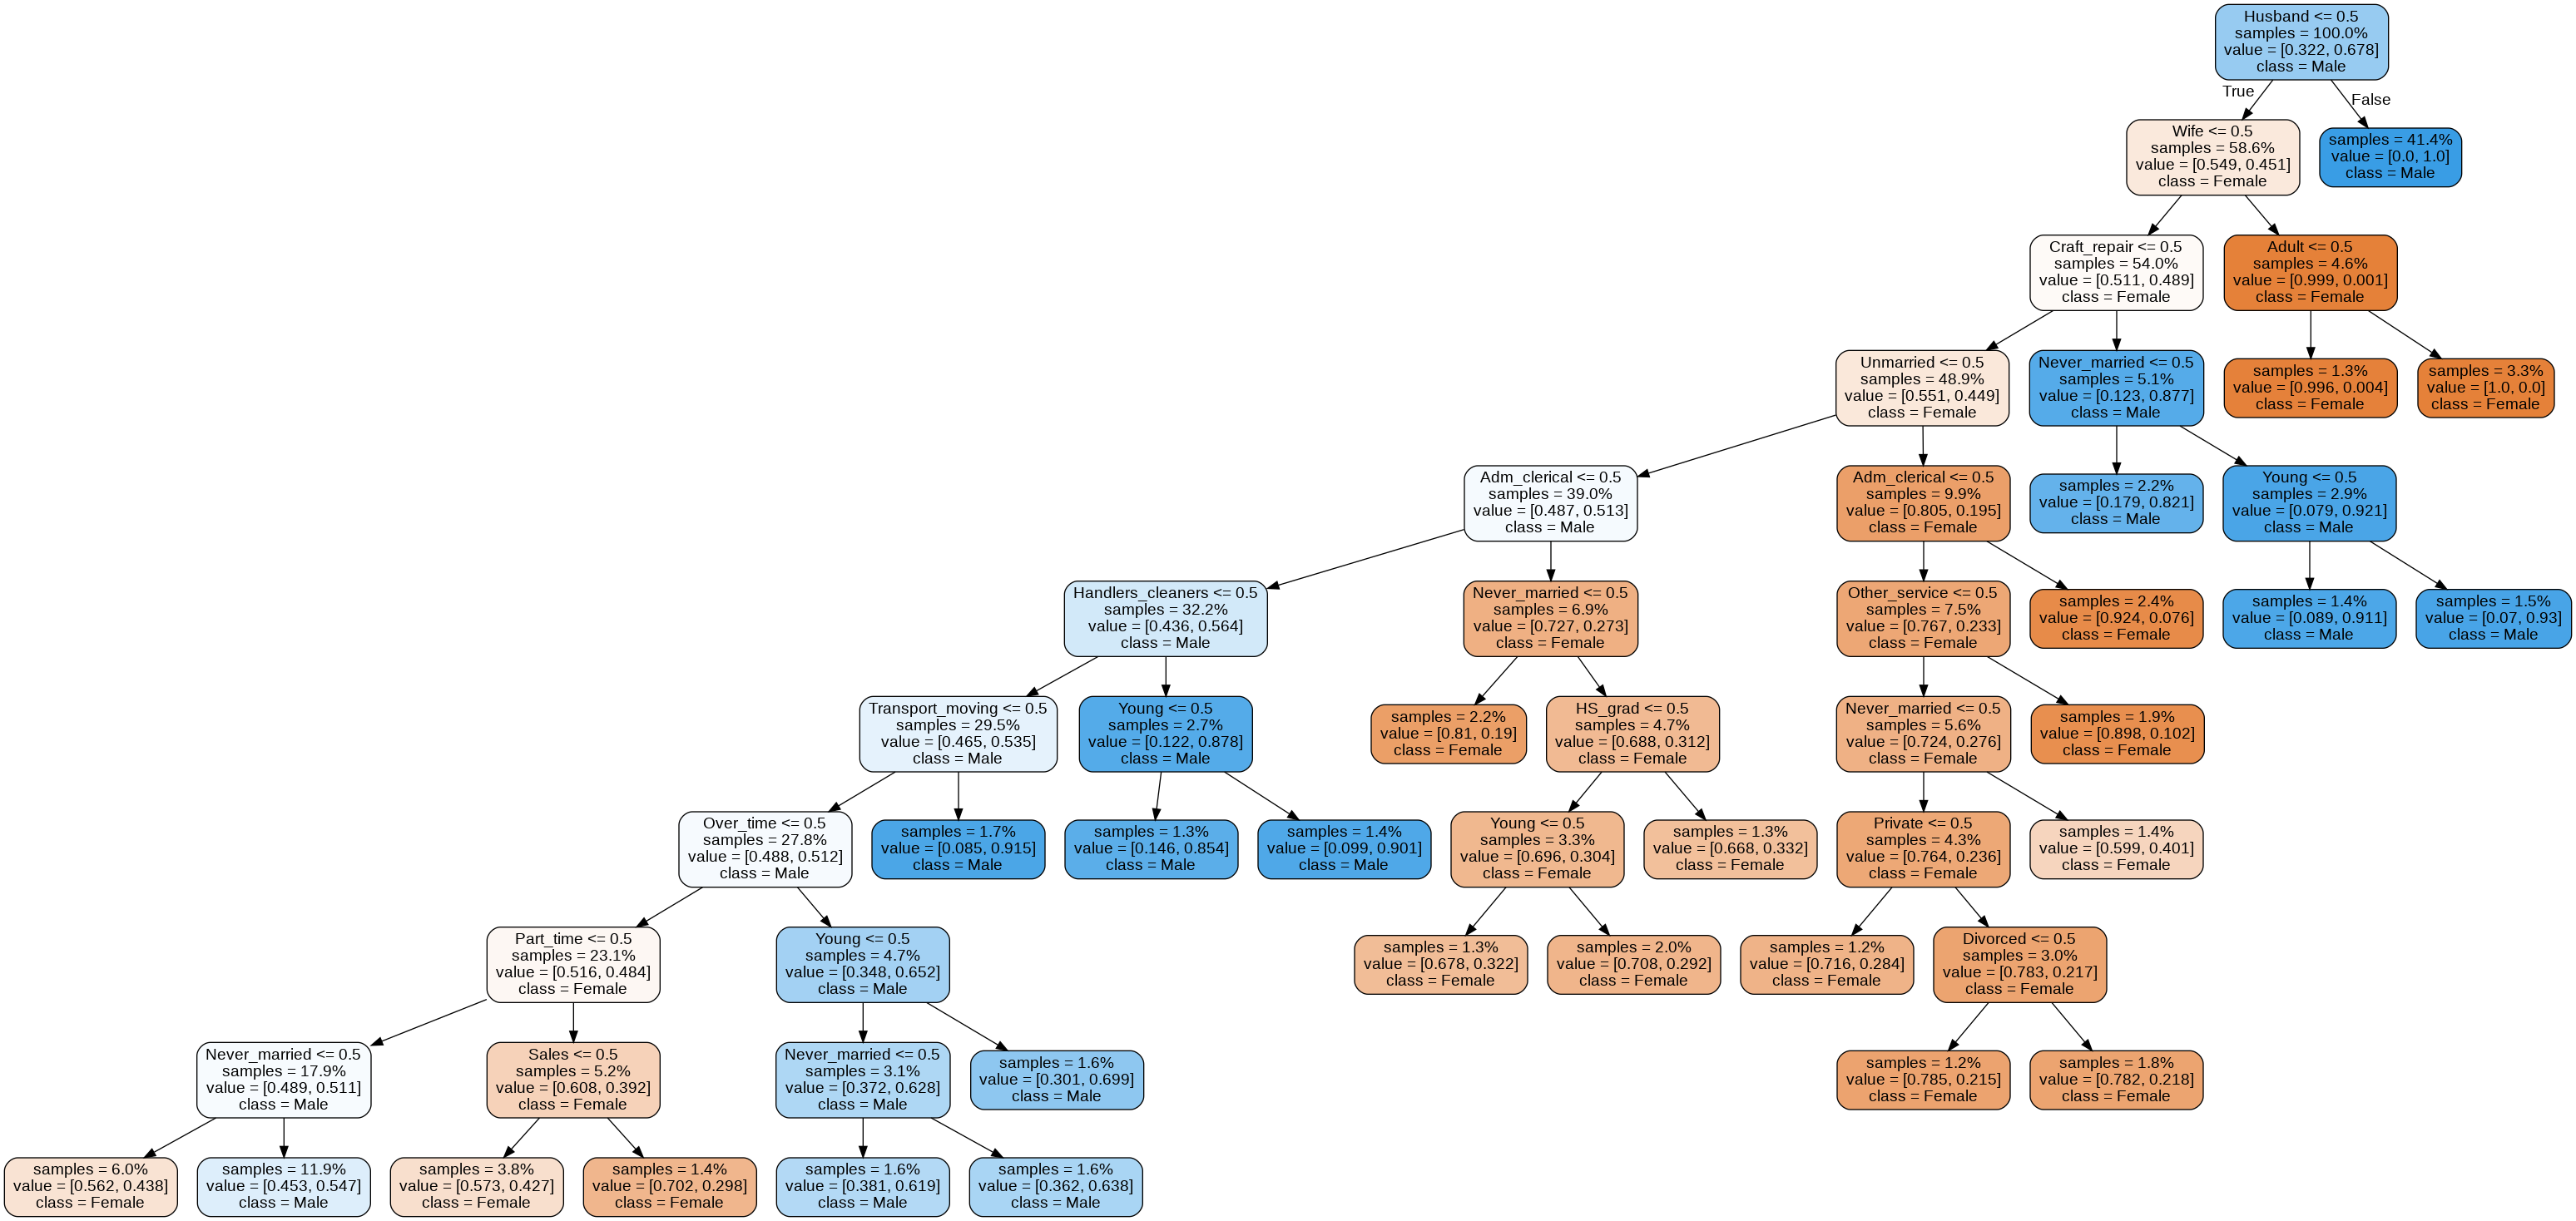

In [ ]:
#Com esse código é possível salvar a imagem da arvore de decisões.
Image(graph.create_png())

##A - **Avaliação**

In [ ]:
precisaotree = str(round(arv.score(X_test,y_test) * 100, 2))+"%" #Medindo a preciso do modelo
print("A acurácia do modelo Árvore de Decisões foi", precisaotree)

A acurácia do modelo Árvore de Decisões foi 83.0%


In [ ]:
print(classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2989
           1       0.87      0.87      0.87      6060

    accuracy                           0.83      9049
   macro avg       0.81      0.81      0.81      9049
weighted avg       0.83      0.83      0.83      9049



In [ ]:
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, treepred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito     0     1  Todos
Real                      
0        2215   774   2989
1         764  5296   6060
Todos    2979  6070   9049


#B - **Regressão Logística**

In [ ]:
reglog = LogisticRegression(solver='lbfgs', max_iter=1000) #Aplicação do algoritmo de regressão logística
reglog.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
regpred = reglog.predict(X_test) #Predição
regpred

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

## B - **Avaliação**

In [ ]:
precisaoreg = str(round(reglog.score(X_test,y_test) * 100, 2))+"%" #Medindo a preciso do modelo
print("A acurácia do modelo de Regressão Logística foi", precisaoreg)

A acurácia do modelo de Regressão Logística foi 84.62%


In [ ]:
print(classification_report(y_test, regpred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      2989
           1       0.90      0.87      0.88      6060

    accuracy                           0.85      9049
   macro avg       0.82      0.83      0.83      9049
weighted avg       0.85      0.85      0.85      9049



In [ ]:
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, regpred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito     0     1  Todos
Real                      
0        2395   594   2989
1         798  5262   6060
Todos    3193  5856   9049


#C - **KNN**

In [ ]:
neibor = KNeighborsClassifier(n_neighbors=5, weights='uniform') #Aplicação do algoritmo KNN
neibor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knnpred = neibor.predict(X_test)
knnpred

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

##C - **Avaliação**

In [ ]:
#Medindo a precisão do modelo
precisaoknn = str(round(neibor.score(X_test,y_test) * 100, 2))+"%" 
print("A acurácia do modelo k-NN foi",precisaoknn)

A acurácia do modelo k-NN foi 82.14%


In [ ]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      2989
           1       0.86      0.87      0.87      6060

    accuracy                           0.82      9049
   macro avg       0.80      0.80      0.80      9049
weighted avg       0.82      0.82      0.82      9049



In [ ]:
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, knnpred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito     0     1  Todos
Real                      
0        2159   830   2989
1         786  5274   6060
Todos    2945  6104   9049


In [ ]:
scores = []
for i in range(100):
 X_train, X_test, y_train, y_test = train_test_split(trn.drop('Sex',axis=1), trn['Sex'], test_size=0.30, random_state=100)
 neighborhood = KNeighborsClassifier(n_neighbors=5, weights='uniform')
 neighborhood.fit(X_train,y_train)

 neighpred = neighborhood.score(X_test, y_test)
 scores.append(neighpred)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 82.14%
Desvio padrão: 0.00%


#D - **Naive Bayes**

In [ ]:
naivem = MultinomialNB()
naivem.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
bayespred = naivem.predict(X_test)
bayespred

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

##D - **Avaliação**

In [ ]:
precisaonaive = str(round(naivem.score(X_test,y_test) * 100, 2))+"%" #Medindo a precisão do modelo
print("A acurácia do modelo Naive Bayes foi", precisaonaive)

A acurácia do modelo Naive Bayes foi 82.94%


In [ ]:
print(classification_report(y_test, bayespred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      2989
           1       0.95      0.79      0.86      6060

    accuracy                           0.83      9049
   macro avg       0.81      0.85      0.82      9049
weighted avg       0.86      0.83      0.83      9049



In [ ]:
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, bayespred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito     0     1  Todos
Real                      
0        2742   247   2989
1        1297  4763   6060
Todos    4039  5010   9049


In [ ]:
scores = []
for i in range(2):
 X_train, X_test, y_train, y_test = train_test_split(trn.drop('Sex',axis=1), trn['Sex'], test_size=0.30, random_state=100)
 naivebays = KNeighborsClassifier()
 naivebays.fit(X_train,y_train)

 nbpred = naivebays.score(X_test, y_test)
 scores.append(nbpred)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 82.14%
Desvio padrão: 0.00%


#E - **Redes Neurais**